<center><H1><b> DS 203 Assignment 7 </b></H1></center>
<center><H2><b> Name: Vinit Awale </b></H2></center>
<center><H2><b> Roll No: 18D070067 </b></H2></center>

## QUESTION 1

### Answer)

| Question | Type of Problem | Input variables | Output variables |
|:--------:|:----------------:|:----------------:|:----------------:|
| a        | Dimension Reduction | Grades of all 50 courses | 5 numbers summarising the grades of all 50 courses |
| b        | Clustering | Student performance in various courses and extra-curricular activities | Personality group for each student |
| c        | Regression | Student performance in various courses, extra-curricular activities, and their first job type | Student's salary |
| d        | Classification | Student performance in various courses, extra-curricular activities | Best job type for each student |

## QUESTION 2

### ANSWER)

| Problem        | Framework | Target output <br> variable | Parameters | Hyperparameters <br> and their typical range | Sklearn command |
|:--------------:|:--------:|:-------------------:|:----------:|:------------------------------:|:----------------------:|
| Classification |SVM with <br> Gaussian Kernel| One Hot Encoding | Support Vectors, Weights (parameters) of the <br> hyperplane or set of hyperplanes used for classification | C : Regularization parameter <br> default value: 1.0 <br> must be strictly positive <br><br> kernel : kernel function used in the algorithm <br> default value: ‘rbf’ <br> must be ‘rbf’ in this case <br><br> gamma : kernel coefficient for ‘rbf’ <br> default value: 'scale' <br> can be 'scale' or 'auto'   | Define: classifier = sklearn.svm.SVC(kernel="rbf") <br> Training : classifier.fit(X_train, y_train) <br> Testing : y_pred = classifier.predict(X_test) | 
|Regression | SVM with <br> Gaussian Kernel| Floating point | Support Vectors, Weights (parameters) of the <br> hyperplane or set of hyperplanes used for classification | C : Regularization parameter <br> default value: 1.0 <br> must be strictly positive <br><br> kernel : kernel function used in the algorithm <br> default value: ‘rbf’ <br> must be ‘rbf’ in this case <br><br> gamma : kernel coefficient for ‘rbf’ <br> default value: 'scale' <br> can be 'scale' or 'auto'   | Define: regressor = sklearn.svm.SVR(kernel="rbf") <br> Training : regressor.fit(X_train, y_train) <br> Testing : y_pred = regressor.predict(X_test) | 
| Classification | NN with <br> one hidden layer | One Hot Encoding | Weights and biases between input layer and hidden layer, <br> weights and biases between hidden layer and output layer | No. of Neurons in the Hidden Layer,<br> Choice of Activation function,<br> learning rate, Regularisation parameter | Define: classifier = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100,)) <br> Training : classifier.fit(X_train, y_train) <br> Testing : y_pred = classifier.predict(X_test) |
| Regression | NN with <br> one hidden layer | Floating point | Weights and biases between input layer and hidden layer, <br> weights and biases between hidden layer and output layer | No. of Neurons in the Hidden Layer,<br> Choice of Activation function,<br> learning rate, Regularisation parameter | Define: regressor = sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(100,)) <br> Training : regressor.fit(X_train, y_train) <br> Testing : y_pred = regressor.predict(X_test) |
| Classification | Random Forest | One Hot Encoding | Number of samples in leaf node, number of samples passing via each node, Threshold value for features in each node | Number of trees in the forest, <br> Minimum number of samples required to split a node, <br> Minimum number of samples in a leaf node, <br> Maximum depth of the tree, <br> Maximum number of features to consider for splits | Define: classifier = sklearn.ensemble.RandomForestClassifier(n_estimators=100) <br> Training : classifier.fit(X_train, y_train) <br> Testing : y_pred = classifier.predict(X_test) |
| Regression | Random Forest | Floating point | Number of samples in leaf node, number of samples passing via each node, Threshold value for features in each node | Number of trees in the forest, <br> Minimum number of samples required to split a node, <br> Minimum number of samples in a leaf node, <br> Maximum depth of the tree, <br> Maximum number of features to consider for splits | Define: regressor = sklearn.ensemble.RandomForestRegressor(n_estimators=100) <br> Training : regressor.fit(X_train, y_train) <br> Testing : y_pred = regressor.predict(X_test) |
| Clustering | K-Means | None | Centroid of Each Cluster, <br> Cluster Assignment of each point  | Number of clusters <br> Number of iterations | Define: model = sklearn.cluster.KMeans(n_clusters=2) <br> Training : classifier.fit(X_train) <br> Testing : y_pred = classifier.predict(X_test) |
| Clustering | DBSCAN | None | Distance from each neighbour, <br> No. of neighbours in a point's cluster | Epsilon Distance, min samples for core point | Define: model = sklearn.cluster.DBSCAN(eps=0.5, min_samples=5) <br> Training : classifier.fit(X_train) <br> Testing : y_pred = classifier.predict(X_test) |
| Dimension <br> Reduction | PCA | None |Projection of original matrix onto the reduced dimensions | Number of components to keep | Define: model = sklearn.decomposition.PCA(n_components=2) <br> Training : classifier.fit(X_train) <br> Testing : y_pred = classifier.predict(X_test) |
| Dimension <br> Reduction | Kernel PCA | None |Projection of original matrix onto the reduced dimensions | Number of components to keep,<br> Type of Kernel, <br> alpha (regularisation) of ridge regression to learn inverse transform | Define: model = sklearn.decomposition.KernelPCA(n_components=2) <br> Training : classifier.fit(X_train) <br> Testing : y_pred = classifier.predict(X_test) |

## QUESTION 3

### IMPORTS

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### READING THE DATASET


In [2]:
df = pd.read_csv(r"Datasets\archive\summer-products-with-rating-and-performance_2020-08.csv")

In [3]:
df.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


### Answer a) 
 - From the dataset we can easily see that the variable to be predicted i.e. the rating is a continuous variable. 
 - Also, clearly this is a labeled dataset, i.e. we know the rating of the cloth items. Hence, we are solving a supervised learning problem.
 - The target variable is the rating of the cloth items, given by 'rating' column in the dataset. 

### Answer b) We will be using R-squared score as a metric for this problem.
 - The R-squared score is a good measure of the goodness of fit of a regression line to the data.
 - The higher the R-squared score, the better the fit.
 - The R-squared score is 1 when the regression line perfectly fits the data.

### Answer c) Let us look at all the features in the dataset


In [4]:
df.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month'],
      dtype='object')

The variables which I feel will be highly predictive of the rating of the cloth items are:  
- 'price'  
- 'retail_price'  
- 'units_sold'  
- 'badges_count'  
- 'badge_local_product'  
- 'badge_product_quality'  
- 'badge_fast_shipping'  
- 'merchant_rating_count'  
- 'merchant_rating'  
- 'theme'

Also, the following variables are not available at the test time and hence will not be used in the model:
- 'rating_five_count'
- 'rating_four_count'
- 'rating_three_count'
- 'rating_two_count'
- 'rating_one_count'

This is because if we have these features beforehand, a simple weighted average of these features will give us the rating of the cloth item. Hence, we remove these features from the dataset.

In [5]:
features_remove = ['rating_five_count' , 'rating_four_count', 'rating_three_count', 'rating_two_count' , 'rating_one_count']

df = df.drop(features_remove, axis = 1)

In [6]:
df.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


From these features the ones which will not contribute to the rating of the cloth item are:
- title and title_orig (Since this is different for all the items and hence nothing can be generalised from it)
- 'shipping_option_name'
- 'shipping_option_price'
- 'shipping_is_express'
- 'countries_shipped_to'
- 'inventory_total'
- 'has_urgency_banner'
- 'urgency_text'

However, we will not simply reject these features as they may be useful in the future.

We will drop the following features since they are simply the unqiue identifier of the cloth item:
- title
- title_orig
- product_id

In [7]:
features_remove = ['title', 'title_orig', 'product_id']

df = df.drop(features_remove, axis = 1)

In [8]:
df.head()

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,...,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,theme,crawl_month
0,16.00,14,EUR,100,0,3.76,54,0,0,0,...,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,summer,2020-08
1,8.00,22,EUR,20000,1,3.45,6135,0,0,0,...,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,summer,2020-08
2,8.00,43,EUR,100,0,3.57,14,0,0,0,...,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,summer,2020-08
3,8.00,8,EUR,5000,1,4.03,579,0,0,0,...,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,summer,2020-08
4,2.72,3,EUR,100,1,3.10,20,0,0,0,...,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,summer,2020-08


### Answer d)
All the features in the dataframe are useable expect these:
- 'merchant_profile_picture'
- 'product_url'
- 'product_picture'


Hence we drop these features from the dataset.

In [9]:
features_remove = ['merchant_profile_picture', 'product_url', 'product_picture']

df = df.drop(features_remove, axis = 1)

## HANDLING MISSING VALUES

In [10]:
df.isna().sum()

price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     41
product_variation_size_id         14
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
has_urgency_banner              1100
urgency_text                    1100
origin_country                    17
merchant_title                     0
merchant_name                      4
merchant_info_subtitle             1
merchant_rating_count              0
m

The features with missing values are:
- product_color
- product_variation_size_id 
- has_urgency_banner
- urgency_text
- origin_country
- merchant_name 
- merchant_info_subtitle

In [11]:
features_remove = ['product_color',
'product_variation_size_id', 
'has_urgency_banner',
'urgency_text',
'origin_country',
'merchant_name', 
'merchant_info_subtitle']

df = df.drop(features_remove, axis = 1)

In [12]:
df.head()

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,...,shipping_is_express,countries_shipped_to,inventory_total,merchant_title,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,theme,crawl_month
0,16.00,14,EUR,100,0,3.76,54,0,0,0,...,0,34,50,zgrdejia,568,4.128521,595097d6a26f6e070cb878d1,0,summer,2020-08
1,8.00,22,EUR,20000,1,3.45,6135,0,0,0,...,0,41,50,SaraHouse,17752,3.899673,56458aa03a698c35c9050988,0,summer,2020-08
2,8.00,43,EUR,100,0,3.57,14,0,0,0,...,0,36,50,hxt520,295,3.989831,5d464a1ffdf7bc44ee933c65,0,summer,2020-08
3,8.00,8,EUR,5000,1,4.03,579,0,0,0,...,0,41,50,allenfan,23832,4.020435,58cfdefdacb37b556efdff7c,0,summer,2020-08
4,2.72,3,EUR,100,1,3.10,20,0,0,0,...,0,35,50,youngpeopleshop,14482,4.001588,5ab3b592c3911a095ad5dadb,0,summer,2020-08


In [13]:
# Get unique values for each object feature
for feature in df.columns:
    print(feature, df[feature].nunique())


price 127
retail_price 104
currency_buyer 1
units_sold 15
uses_ad_boosts 2
rating 192
rating_count 761
badges_count 4
badge_local_product 2
badge_product_quality 2
badge_fast_shipping 2
tags 1230
product_variation_inventory 48
shipping_option_name 15
shipping_option_price 8
shipping_is_express 2
countries_shipped_to 94
inventory_total 10
merchant_title 958
merchant_rating_count 917
merchant_rating 952
merchant_id 958
merchant_has_profile_picture 2
theme 1
crawl_month 1


We reject categorical features with more than 50% unique values. Also, we reject features with only one unique value.

In [14]:
df.shape

(1573, 25)

Since we have 1573 entries in the dataset, we reject the categorical features with more than 50% unique values i.e. we reject the features with more than 786 unique values. Also, we reject the features with only one unique value. Hence we drop the following features from the dataset:
- merchant_title
- merchant_id
- theme
- crawl_month
- currency_buyer
- tags

In [15]:
features_remove = ['merchant_title' , 'merchant_id' , 'theme', 'crawl_month', 'currency_buyer', 'tags']

df = df.drop(features_remove, axis = 1)

In [16]:
df.dtypes

price                           float64
retail_price                      int64
units_sold                        int64
uses_ad_boosts                    int64
rating                          float64
rating_count                      int64
badges_count                      int64
badge_local_product               int64
badge_product_quality             int64
badge_fast_shipping               int64
product_variation_inventory       int64
shipping_option_name             object
shipping_option_price             int64
shipping_is_express               int64
countries_shipped_to              int64
inventory_total                   int64
merchant_rating_count             int64
merchant_rating                 float64
merchant_has_profile_picture      int64
dtype: object

In [17]:
# Features with dtype object
object_features = df.select_dtypes(include=['object']).columns

In [18]:
object_features

Index(['shipping_option_name'], dtype='object')

### ONE HOT ENCODING

In [19]:
# One hot encoding for object_features
df = pd.get_dummies(df, columns=object_features)

In [20]:
df.head()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,...,shipping_option_name_Livraison standard,shipping_option_name_Spedizione standard,shipping_option_name_Standard Shipping,shipping_option_name_Standardowa wysyłka,shipping_option_name_Standardversand,shipping_option_name_Standart Gönderi,shipping_option_name_Стандартная доставка,shipping_option_name_الشحن القياسي,shipping_option_name_การส่งสินค้ามาตรฐาน,shipping_option_name_ការដឹកជញ្ជូនតាមស្តង់ដារ
0,16.00,14,100,0,3.76,54,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,8.00,22,20000,1,3.45,6135,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,8.00,43,100,0,3.57,14,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,8.00,8,5000,1,4.03,579,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,2.72,3,100,1,3.10,20,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [21]:
df.dtypes

price                                           float64
retail_price                                      int64
units_sold                                        int64
uses_ad_boosts                                    int64
rating                                          float64
rating_count                                      int64
badges_count                                      int64
badge_local_product                               int64
badge_product_quality                             int64
badge_fast_shipping                               int64
product_variation_inventory                       int64
shipping_option_price                             int64
shipping_is_express                               int64
countries_shipped_to                              int64
inventory_total                                   int64
merchant_rating_count                             int64
merchant_rating                                 float64
merchant_has_profile_picture                    

### Normalization of features with dtype 'int64' and 'float64'

In [22]:
# Find features with dtpe int64 and float64

numerical_features = df.select_dtypes(include=['int64' , 'float64']).columns

In [23]:
numerical_features

Index(['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating',
       'rating_count', 'badges_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping',
       'product_variation_inventory', 'shipping_option_price',
       'shipping_is_express', 'countries_shipped_to', 'inventory_total',
       'merchant_rating_count', 'merchant_rating',
       'merchant_has_profile_picture'],
      dtype='object')

Of these features the features 'merchant_has_profile_picture' and 'shipping_is_express' are categorical features. Hence we will not normalize these features.

In [24]:
numerical_features = numerical_features.drop(['merchant_has_profile_picture' ,'shipping_is_express'])

In [25]:
# Normalize numerical features

for feature in numerical_features:
    df[feature] = (df[feature] - np.mean(df[feature])) / np.std(df[feature])

In [26]:
df.head()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,...,shipping_option_name_Livraison standard,shipping_option_name_Spedizione standard,shipping_option_name_Standard Shipping,shipping_option_name_Standardowa wysyłka,shipping_option_name_Standardversand,shipping_option_name_Standart Gönderi,shipping_option_name_Стандартная доставка,shipping_option_name_الشحن القياسي,shipping_option_name_การส่งสินค้ามาตรฐาน,shipping_option_name_ការដឹកជញ្ជូនតាមស្តង់ដារ
0,1.952444,-0.306068,-0.453197,-0.873758,-0.118197,-0.421348,-0.309837,-0.137049,-0.283473,-0.113483,...,1,0,0,0,0,0,0,0,0,0
1,-0.082775,-0.042461,1.674334,1.144482,-0.719894,2.644757,-0.309837,-0.137049,-0.283473,-0.113483,...,1,0,0,0,0,0,0,0,0,0
2,-0.082775,0.649507,-0.453197,-0.873758,-0.486979,-0.441517,-0.309837,-0.137049,-0.283473,-0.113483,...,1,0,0,0,0,0,0,0,0,0
3,-0.082775,-0.503773,0.070668,1.144482,0.405861,-0.156638,-0.309837,-0.137049,-0.283473,-0.113483,...,1,0,0,0,0,0,0,0,0,0
4,-1.426020,-0.668528,-0.453197,1.144482,-1.399229,-0.438491,-0.309837,-0.137049,-0.283473,-0.113483,...,1,0,0,0,0,0,0,0,0,0


In [27]:
df.shape

(1573, 33)

We can see that the df has 33 features. Hence, we need to reduce the dimensionality of the dataset.

In [28]:
# Split the dataset in X and y
X = df.drop('rating', axis = 1)
y = df['rating']
numerical_features = numerical_features.drop(['rating'])
object_features = df.columns.difference(numerical_features)
object_features = object_features.drop('rating')

In [29]:
object_features

Index(['merchant_has_profile_picture', 'shipping_is_express',
       'shipping_option_name_Ekspresowa wysyłka',
       'shipping_option_name_Envio Padrão',
       'shipping_option_name_Envío normal',
       'shipping_option_name_Expediere Standard',
       'shipping_option_name_Livraison Express',
       'shipping_option_name_Livraison standard',
       'shipping_option_name_Spedizione standard',
       'shipping_option_name_Standard Shipping',
       'shipping_option_name_Standardowa wysyłka',
       'shipping_option_name_Standardversand',
       'shipping_option_name_Standart Gönderi',
       'shipping_option_name_Стандартная доставка',
       'shipping_option_name_الشحن القياسي',
       'shipping_option_name_การส่งสินค้ามาตรฐาน',
       'shipping_option_name_ការដឹកជញ្ជូនតាមស្តង់ដារ'],
      dtype='object')

In [30]:
numerical_features.nunique()

15

Hence there are 15 numerical features in total. By performing PCA we bring that down to 5 features.

### Answer f)

In [72]:
# PCA for the features in the dataset which are numerical
from sklearn.decomposition import PCA


pca = PCA(n_components=10)

X_pca = pca.fit_transform(X[numerical_features])

In [73]:
X_pca

array([[ 0.86419104,  2.03205615, -1.35852029, ..., -0.97406604,
        -0.02270946,  0.46478624],
       [ 0.42801654, -2.14051137, -1.58303345, ..., -0.47051046,
        -0.00994885, -1.41048579],
       [-0.59905336,  0.9360163 ,  0.07900654, ...,  1.16042474,
        -0.12834932,  0.40017213],
       ...,
       [-1.26875779,  0.17017511,  0.58444635, ...,  0.49069316,
        -0.30534186,  0.92736271],
       [-0.31280568,  1.50445946, -0.59573822, ..., -0.24390698,
         1.00007034,  0.0944306 ],
       [-0.50492062,  0.0201617 ,  0.30190665, ..., -1.22422481,
        -0.92551073, -0.01048253]])

In [75]:
# Concatanate the PCA features with the categorical features
X_pca = pd.DataFrame(X_pca)
X_pca.columns = ['PCA_' + str(i) for i in range(1,11)]

# Concatenate the dataframes
X_concat = pd.concat([X[object_features], X_pca], axis = 1)



In [76]:
X_concat.head()

,merchant_has_profile_picture,shipping_is_express,shipping_option_name_Ekspresowa wysyłka,shipping_option_name_Envio Padrão,shipping_option_name_Envío normal,shipping_option_name_Expediere Standard,shipping_option_name_Livraison Express,shipping_option_name_Livraison standard,shipping_option_name_Spedizione standard,shipping_option_name_Standard Shipping,...,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10
0,0,0,0,0,0,0,0,1,0,0,...,0.864191,2.032056,-1.358520,0.326119,-0.393918,0.016003,-0.593013,-0.974066,-0.022709,0.464786
1,0,0,0,0,0,0,0,1,0,0,...,0.428017,-2.140511,-1.583033,-1.263246,0.018867,-0.591341,0.373536,-0.470510,-0.009949,-1.410486
2,0,0,0,0,0,0,0,1,0,0,...,-0.599053,0.936016,0.079007,-0.466905,-0.234143,0.357018,-0.312643,1.160425,-0.128349,0.400172
3,0,0,0,0,0,0,0,1,0,0,...,-0.470319,-0.185161,-0.084137,0.068902,0.320660,-0.390944,0.627004,-0.983334,-0.077374,-0.356520
4,0,0,0,0,0,0,0,1,0,0,...,-1.959373,-0.821403,1.645305,-0.587585,0.171468,0.175506,0.837135,0.000880,-0.367289,0.065128


### Answer g) 
 The ML frameworks that work best for such problems in the order of accuracy are:
 - Neural Networks
 - Random Forest Regressor
 - SVM
 - Lasso Regressor
 - Ridge Regressor

 The ML frameworks that we will be using are:
 - LASSO REGRESSION
 - RANDOM FOREST REGRESSION

### Answer h)

In [77]:
# Now we split the dataset in train, validation and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_concat, y, test_size = 0.3, random_state = 42) # Split the data into 70:30 train:test

# Now we split the test dataset in validation and test
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42) # Split the data into test and validation

# Hence we now have the train, validation and test datasets in the proportion 70:15:15

In [78]:
from sklearn.model_selection import RepeatedKFold, cross_val_score, train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import Lasso, Ridge 
from sklearn.metrics import mean_squared_error, r2_score

## LASSO Regression

### Answer i) 
The hyperparameters that we will vary for the LASSO Regression are:
- alpha : Regularisation (float) 
- max_iter : Max number of iterations of optimiser (int)

In [79]:
#Defining our Model
model= Lasso()

#Defining our search space
space= {}
space['alpha']= [0.01,0.05,0.1,0.5,1,5,10,50,100]
space['max_iter']= np.arange(1500,2201, 50)
#space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']

#Defining Cross Validation Function
cv= RepeatedKFold(n_splits=5, n_repeats=1)

#Randomised Search Begins
search= GridSearchCV(model, space, cv=cv, scoring='neg_mean_squared_error',n_jobs=-1)

#search= RandomizedSearchCV(model, space, n_iter= 250, scoring='neg_mean_squared_error'\
#                          ,n_jobs= -1, cv= cv, random_state= 1)

result= search.fit(X_train, y_train)

result.best_params_

{'alpha': 0.01, 'max_iter': 1500}

This result was expected, since lower value of alpha gives a model that fits the test dataset well. However, we will go ahead with these values of the hyperparameters.

In [81]:
model= Lasso(alpha=0.01, max_iter=1500)
model.fit(X_train, y_train)
y_test_pred= model.predict(X_test)

RMSE= np.sqrt(mean_squared_error(y_test, y_test_pred))
r2= r2_score(y_test, y_test_pred)

print("Root Mean Squared Error = %f"%RMSE)
print('R2 Score = %f'%r2)

Root Mean Squared Error = 0.931684
R2 Score = 0.068734


## Random Forest Regression

### HyperParameters for RF Regressor: 
1. No. of Trees (n_estimators) 
2. Depth of the tree (max_depth) 
3. Minimum Samples required to be at a leaf node (min_samples_leaf)

In [82]:
from sklearn.ensemble import RandomForestRegressor
#Defining Model
model= RandomForestRegressor()

#Defining Space for Hyperparameter Search
space={}
space['n_estimators']= [100,250,500,750]
space['max_depth']= np.arange(5,11)
space['min_samples_leaf']= np.arange(1,5)

#Defining Cross Validation Set
cv= RepeatedKFold(n_splits= 5, n_repeats= 1)

#Grid Search Begins
search= RandomizedSearchCV(model, space, cv=cv, n_jobs=-1, scoring='neg_mean_squared_error'\
                           , n_iter=50, random_state=2)

result= search.fit(X_train, y_train)
result.best_params_

{'n_estimators': 750, 'min_samples_leaf': 1, 'max_depth': 10}

In [83]:
model= RandomForestRegressor(n_estimators=750 ,max_depth=10 ,max_features='auto' ,min_samples_leaf=1 )
model.fit(X_train, y_train)
y_test_pred= model.predict(X_test)

RMSE= np.sqrt(mean_squared_error(y_test, y_test_pred))
r2= r2_score(y_test, y_test_pred)

print("Root Mean Squared Error = %f"%RMSE)
print('R2 Score = %f'%r2)

Root Mean Squared Error = 0.855624
R2 Score = 0.214580


The results obtained are not so satisfactory. I am assuming that the reason for this is the dimensionality reduction done using PCA. Let us try the same models on the dataset without dimensionality reduction

In [86]:
# Now we split the dataset in train, validation and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42) # Split the data into 70:30 train:test

# Now we split the test dataset in validation and test
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42) # Split the data into test and validation

# Hence we now have the train, validation and test datasets in the proportion 70:15:15

In [87]:
from sklearn.model_selection import RepeatedKFold, cross_val_score, train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import Lasso, Ridge 
from sklearn.metrics import mean_squared_error, r2_score

## LASSO Regression

### Answer i) 
The hyperparameters that we will vary for the LASSO Regression are:
- alpha : Regularisation (float) 
- max_iter : Max number of iterations of optimiser (int)

In [88]:
#Defining our Model
model= Lasso()

#Defining our search space
space= {}
space['alpha']= [0.01,0.05,0.1,0.5,1,5,10,50,100]
space['max_iter']= np.arange(1500,2201, 50)
#space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']

#Defining Cross Validation Function
cv= RepeatedKFold(n_splits=5, n_repeats=1)

#Randomised Search Begins
search= GridSearchCV(model, space, cv=cv, scoring='neg_mean_squared_error',n_jobs=-1)

#search= RandomizedSearchCV(model, space, n_iter= 250, scoring='neg_mean_squared_error'\
#                          ,n_jobs= -1, cv= cv, random_state= 1)

result= search.fit(X_train, y_train)

result.best_params_

{'alpha': 0.01, 'max_iter': 1500}

This result was expected, since lower value of alpha gives a model that fits the test dataset well. However, we will go ahead with these values of the hyperparameters.

In [89]:
model= Lasso(alpha=0.01, max_iter=1500)
model.fit(X_train, y_train)
y_test_pred= model.predict(X_test)

RMSE= np.sqrt(mean_squared_error(y_test, y_test_pred))
r2= r2_score(y_test, y_test_pred)

print("Root Mean Squared Error = %f"%RMSE)
print('R2 Score = %f'%r2)

Root Mean Squared Error = 0.925488
R2 Score = 0.081079


## Random Forest Regression

### HyperParameters for RF Regressor: 
1. No. of Trees (n_estimators) 
2. Depth of the tree (max_depth) 
3. Minimum Samples required to be at a leaf node (min_samples_leaf)

In [90]:
from sklearn.ensemble import RandomForestRegressor
#Defining Model
model= RandomForestRegressor()

#Defining Space for Hyperparameter Search
space={}
space['n_estimators']= [100,250,500,750]
space['max_depth']= np.arange(5,11)
space['min_samples_leaf']= np.arange(1,5)

#Defining Cross Validation Set
cv= RepeatedKFold(n_splits= 5, n_repeats= 1)

#Grid Search Begins
search= RandomizedSearchCV(model, space, cv=cv, n_jobs=-1, scoring='neg_mean_squared_error'\
                           , n_iter=50, random_state=2)

result= search.fit(X_train, y_train)
result.best_params_

{'n_estimators': 250, 'min_samples_leaf': 1, 'max_depth': 10}

In [91]:
model= RandomForestRegressor(n_estimators=750 ,max_depth=10 ,max_features='auto' ,min_samples_leaf=1 )
model.fit(X_train, y_train)
y_test_pred= model.predict(X_test)

RMSE= np.sqrt(mean_squared_error(y_test, y_test_pred))
r2= r2_score(y_test, y_test_pred)

print("Root Mean Squared Error = %f"%RMSE)
print('R2 Score = %f'%r2)

Root Mean Squared Error = 0.722643
R2 Score = 0.439747


### Answer l)

My hypothesis that dimensionality reduction was causing a lower r2 score is indeed correct. However, even after considering the entire dataset, we do not get a good r squared score. According to [1], for a good correlation among the variables the r squared score should be atleast above 0.7. Hence, the trained model are *NOT* usable for our case



## QUESTION 4 

In [17]:
# Import requests
import requests

url='https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data'
response= requests.get(url)

raw_data= response.content.decode('utf-8')
raw_data= raw_data.split('\n')

with open('CreditApproval.csv','w') as file:
    for row in raw_data:
        file.write(row+'\n')

df=pd.read_csv('CreditApproval.csv', header=None)

In [18]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [19]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,00000,0,-


### Answer a) 
 - From the dataset we can easily see that the variable to be predicted is a discrete variable 
 - Also, clearly this is a labeled dataset. Hence, we are solving a supervised learning problem.

### Answer b) We will be using F1 score as a metric for this problem

### Answer c) Let us look at all the features in the dataset


In [20]:
df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], dtype='int64')

In [21]:
df.dtypes

0      object
1      object
2     float64
3      object
4      object
5      object
6      object
7     float64
8      object
9      object
10      int64
11     object
12     object
13     object
14      int64
15     object
dtype: object

In the given dataset, all attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. Hence, from the columns we cannot tell which features will be most relevant for the predictions.

### Answer d)
All the features in the dataframe are useable.

## HANDLING MISSING VALUES

In [22]:
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64

This shows that the dataset has no missing values. However, when we look at the dataset, we can see that there are some features with missing values. Hence, we will have to handle missing values. First let us convert the missing values to NaN.

In [23]:
df[0]= df.replace({0:{'?':np.nan}})[0]
df[1]= pd.to_numeric(df.replace({1:{'?': np.nan}})[1])
df[5]= df.replace({5:{'?':np.nan}})[0]
df[6]= df.replace({6:{'?':np.nan}})[0]
df[13]= pd.to_numeric(df.replace({13:{'?':np.nan}})[13])
df[15]= df.replace({15:{'+':1, '-':0}})[15]

In [24]:
df.isnull().sum()

0     12
1     12
2      0
3      0
4      0
5     12
6     12
7      0
8      0
9      0
10     0
11     0
12     0
13    13
14     0
15     0
dtype: int64

We drop the entries with missing values from the dataset.

In [25]:
index_0 = list(df[df[0].isnull()].index)
index_1 = list(df[df[1].isnull()].index)
index_5 = list(df[df[5].isnull()].index)
index_6 = list(df[df[6].isnull()].index)
index_13 = list(df[df[13].isnull()].index)

# Drop the rows with missing values
indices = list(set(index_0 + index_1 + index_5 +  index_6 + index_13))
df = df.drop(indices)

In [26]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,b,b,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,a,a,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,a,a,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,b,b,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,b,b,1.71,t,f,0,f,s,120.0,0,1


In [27]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64

### One hot encoding

In [28]:
one_hot1= pd.get_dummies(df[[0,3,4,5,6,8,9,11,12]])
df= pd.concat([df.drop([0,3,4,5,6,8,9,11,12], axis=1), one_hot1], axis=1)

In [29]:
df[15]

0      1
1      1
2      1
3      1
4      1
      ..
685    0
686    0
687    0
688    0
689    0
Name: 15, Length: 654, dtype: int64

### Splitting the dataset into test and train

In [30]:
X= df.drop([15], axis=1)
y= df[15]

In [31]:
X.head()

,1,2,7,10,13,14,0_a,0_b,3_l,3_u,...,6_b,8_f,8_t,9_f,9_t,11_f,11_t,12_g,12_p,12_s
0,30.83,0.000,1.25,1,202.0,0,0,1,0,1,...,1,0,1,0,1,1,0,1,0,0
1,58.67,4.460,3.04,6,43.0,560,1,0,0,1,...,0,0,1,0,1,1,0,1,0,0
2,24.50,0.500,1.50,0,280.0,824,1,0,0,1,...,0,0,1,1,0,1,0,1,0,0
3,27.83,1.540,3.75,5,100.0,3,0,1,0,1,...,1,0,1,0,1,0,1,1,0,0
4,20.17,5.625,1.71,0,120.0,0,0,1,0,1,...,1,0,1,1,0,1,0,0,0,1


### Normalization of features with dtype 'int64' and 'float64'

In [32]:
continuous_features = X.select_dtypes(include=['float64', 'int64']).columns

for feature in continuous_features:
    X[feature] = (X[feature] - X[feature].mean()) / (X[feature].std())

X.head()

,1,2,7,10,13,14,0_a,0_b,3_l,3_u,...,6_b,8_f,8_t,9_f,9_t,11_f,11_t,12_g,12_p,12_s
0,-0.062457,-0.961631,-0.294340,-0.301767,0.130207,-0.192926,0,1,0,1,...,1,0,1,0,1,1,0,1,0,0
1,2.261069,-0.073768,0.236944,0.705149,-0.814446,-0.086246,1,0,0,1,...,0,0,1,0,1,1,0,1,0,0
2,-0.590759,-0.862095,-0.220138,-0.503150,0.593622,-0.035953,1,0,0,1,...,0,0,1,1,0,1,0,1,0,0
3,-0.312837,-0.655060,0.447676,0.503766,-0.475797,-0.192355,0,1,0,1,...,1,0,1,0,1,0,1,1,0,0
4,-0.952141,0.158152,-0.157809,-0.503150,-0.356973,-0.192926,0,1,0,1,...,1,0,1,1,0,1,0,0,0,1


### Answer g)
 The ML frameworks that work best for such problems in the order of accuracy are:
 - Neural Networks Classifier
 - Random Forest Classifier
 - SVM
 - Logistic Classifier with Regularization

 The ML frameworks that we will be using are:
 - Neural Networks Classifier
 - RANDOM FOREST Classifier

### Answer h)

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Neural Network

The hyperparameters that we will vary for the Neural Network are:
- hidden_layer_sizes : The number of nodes in each hidden layer (tuple)
- alpha : Regularisation (float)
- activation : Activation function for hidden layers (string)
- max_iter : Max number of iterations of optimiser (int)

In [34]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import RepeatedKFold, KFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.neural_network import MLPClassifier

#Defining Model
classifier_neural_network = MLPClassifier(max_iter=1500, solver='lbfgs')

#Defining Space
space={}
space['alpha']= [0.05,0.1,0.5,1,5,10]
space['hidden_layer_sizes']=[(100,),(50,50),(60,60)]
space['activation'] = ['logistic', 'tanh', 'relu']
space['max_iter'] = [1000,1500,2000]

#Defining Cross Validation Set
cv= RepeatedKFold(n_splits=5, n_repeats=1)

#Randomised Search Begins
search= GridSearchCV(classifier_neural_network, space, scoring='f1', n_jobs=-1, cv=cv)

result= search.fit(X_train, y_train)
result.best_params_

{'activation': 'tanh',
 'alpha': 10,
 'hidden_layer_sizes': (100,),
 'max_iter': 1000}

### Training the Neural Network with the best hyperparameters

In [35]:
classifier_neural_network= MLPClassifier(alpha=10, hidden_layer_sizes=(100,), solver='lbfgs', max_iter=1500)
classifier_neural_network.fit(X_train, y_train)
y_test_pred= classifier_neural_network.predict(X_test)

accuracy= accuracy_score(y_test, y_test_pred)
f1= f1_score(y_test,y_test_pred)

print('Accuracy is = %f %% '%(accuracy*100,))
print('F1 Score is = %f'%f1)

Accuracy is = 83.206107 % 
F1 Score is = 0.816667


### Confusion Matrix

In [36]:
from sklearn.metrics import confusion_matrix
print("confusion_matrix")
print(confusion_matrix(y_test, y_test_pred))

confusion_matrix
[[60 15]
 [ 7 49]]


## Random Forest Classifier

The hyperparameters that we will vary for the Random Forest Classifier are:
- n_estimators : The number of trees in the forest (int)
- max_depth : The maximum depth of the tree (int)
- max_features : The number of features to consider when looking for the best split (int)
- min_samples_leaf : The minimum number of samples required to be at a leaf node (int)

In [37]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(n_estimators=750, max_depth=10, max_features='auto', min_samples_leaf=1)

# Define the space
space = {}
space['n_estimators'] = [100, 200, 400, 600, 800]
space['max_depth'] = [5, 10, 15, 20, 25]
space['max_features'] = ['auto', 'sqrt', 'log2']
space['min_samples_leaf'] = [1, 3, 5]

#Defining Cross Validation Set
cv= RepeatedKFold(n_splits=5, n_repeats=1)

#Randomised Search Begins
search= GridSearchCV(classifier_rf, space, cv=cv, scoring='f1',n_jobs=-1)

result= search.fit(X_train, y_train)
result.best_params_

{'max_depth': 25,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'n_estimators': 100}

### Training the Random Forest Classifier with the best hyperparameters

In [38]:
classifier_rf= MLPClassifier(alpha=10, hidden_layer_sizes=(100,), solver='lbfgs', max_iter=1500)
classifier_rf.fit(X_train, y_train)
y_test_pred= classifier_rf.predict(X_test)

accuracy= accuracy_score(y_test, y_test_pred)
f1= f1_score(y_test,y_test_pred)

print('Accuracy is = %f %% '%(accuracy*100,))
print('F1 Score is = %f'%f1)

Accuracy is = 83.206107 % 
F1 Score is = 0.816667


### Confusion Matrix

In [39]:
from sklearn.metrics import confusion_matrix
print("confusion_matrix")
print(confusion_matrix(y_test, y_test_pred))

confusion_matrix
[[60 15]
 [ 7 49]]


The results are good! Hence, both the models are usable for our case.

## QUESTION 5

In [40]:
df0=pd.read_csv("Datasets\\archive_5\\0.csv", header=None)
df1=pd.read_csv("Datasets\\archive_5\\1.csv", header=None)
df2=pd.read_csv("Datasets\\archive_5\\2.csv", header=None)
df3=pd.read_csv("Datasets\\archive_5\\3.csv", header=None)

data=pd.concat([df0,df1,df2,df3])

In [41]:
data

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,...,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0,0
1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
2,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,...,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
3,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,...,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
4,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,...,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,-3.0,-1.0,-1.0,-1.0,-28.0,20.0,5.0,0.0,-5.0,0.0,...,-3.0,1.0,4.0,3.0,4.0,-51.0,-49.0,5.0,-9.0,3
2918,-13.0,-5.0,-4.0,-3.0,-4.0,-24.0,-10.0,-8.0,20.0,9.0,...,6.0,-3.0,-3.0,-3.0,-5.0,-4.0,-45.0,-12.0,-15.0,3
2919,-1.0,-3.0,-1.0,1.0,30.0,38.0,-1.0,36.0,-10.0,1.0,...,14.0,-8.0,-4.0,-4.0,-4.0,-21.0,-29.0,-5.0,0.0,3
2920,1.0,4.0,4.0,5.0,9.0,-10.0,4.0,1.0,-2.0,-1.0,...,-16.0,-3.0,0.0,-3.0,-5.0,-36.0,-90.0,3.0,5.0,3


### Data Normalization

In [42]:
X=data.drop(64, axis=1)
y=data[64]

#Normalisation of the Dataframe but not feature scaling
mu= X.mean()
std= X.std()
X= (X-mu)#/std
X

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,26.52038,4.726837,5.739082,8.729748,-0.840897,-12.44511,-107.727351,-65.338157,-8.334047,2.654222,...,22.622452,-27.067306,61.836958,4.740623,8.76871,5.705343,4.146686,-6.625193,-57.550694,16.609094
1,-46.47962,-5.273163,-4.260918,-6.270252,13.159103,-0.44511,36.272649,-9.338157,10.665953,-3.345778,...,-103.377548,-24.067306,47.836958,6.740623,6.76871,5.705343,13.146686,21.374807,112.449306,15.609094
2,-18.47962,-7.273163,-7.260918,-7.270252,-20.840897,-5.44511,-77.727351,12.661843,0.665953,5.654222,...,-126.377548,-82.067306,7.836958,7.740623,1.76871,-7.294657,7.146686,21.374807,115.449306,48.609094
3,2.52038,3.726837,0.739082,2.729748,0.159103,22.55489,107.272649,-13.338157,-15.334047,-1.345778,...,-52.377548,-37.067306,-10.163042,4.740623,7.76871,11.705343,33.146686,39.374807,120.449306,43.609094
4,6.52038,0.726837,0.739082,-1.270252,-13.840897,10.55489,-49.727351,5.661843,7.665953,0.654222,...,61.622452,38.932694,-34.163042,-7.259377,2.76871,6.705343,-12.853314,-23.625193,-110.550694,-68.390906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,-2.47962,-0.273163,-0.260918,-0.270252,-27.840897,20.55489,6.272649,0.661843,-4.334047,0.654222,...,-1.377548,-2.067306,1.836958,4.740623,3.76871,4.705343,-50.853314,-48.625193,6.449306,-8.390906
2918,-12.47962,-4.273163,-3.260918,-2.270252,-3.840897,-23.44511,-8.727351,-7.338157,20.665953,9.654222,...,6.622452,6.932694,-2.163042,-2.259377,-2.23129,-4.294657,-3.853314,-44.625193,-10.550694,-14.390906
2919,-0.47962,-2.273163,-0.260918,1.729748,30.159103,38.55489,0.272649,36.661843,-9.334047,1.654222,...,13.622452,14.932694,-7.163042,-3.259377,-3.23129,-3.294657,-20.853314,-28.625193,-3.550694,0.609094
2920,1.52038,4.726837,4.739082,5.729748,9.159103,-9.44511,5.272649,1.661843,-1.334047,-0.345778,...,-0.377548,-15.067306,-2.163042,0.740623,-2.23129,-4.294657,-35.853314,-89.625193,4.449306,5.609094


In [43]:
from sklearn.decomposition import PCA
m,n= X.shape
components=0

stdRMSE=[]

for i in range(n):
    pcamodel= PCA(n_components=i)
    X_reduced= pcamodel.fit_transform(X)
    X_approx= pcamodel.inverse_transform(X_reduced)

    MSE= np.sum(np.sum((X-X_approx)**2))/m
    var_L2= (np.var(np.sqrt(np.sum(X**2, axis=1))))
    
    stdRMSE.append(np.sqrt(MSE/var_L2))
    
    if (MSE/var_L2) <= 0.01:
        components = i
        break

components

61

In [44]:
pcamodel= PCA(n_components=61)
X_reduced= pcamodel.fit_transform(X)
X_approx= pcamodel.inverse_transform(X_reduced)

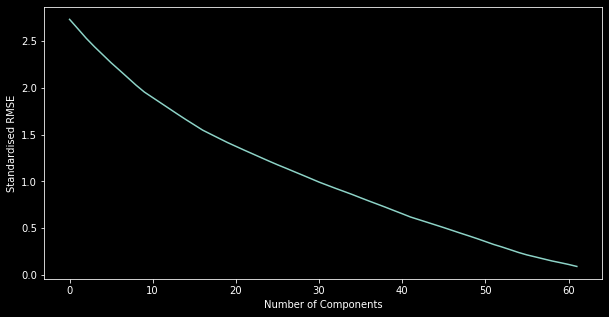

In [45]:
plt.figure(figsize=(10,5))
plt.plot(stdRMSE)
plt.xlabel('Number of Components')
plt.ylabel("Standardised RMSE")
plt.show()

# RESOURCES
[1] https://www.investopedia.com/terms/r/r-squared.asp